# Analyse des données

[calcul de l index glycemique](#test)

[calcul du gluciscore](#gluci)

[Analyse multivariées](#multi)

[Mesures de concentration ](#gini)

[tableau de contingence](#cont)


[regression lineaire](#reg)

[Test du Chi 2](#chi)

[Test de normalité Kolmogorov Smirnov](#Smirnov)



In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None ) #pour afficher toutes les colonnes
pd.set_option('display.max_rows', None ) #pour afficher toutes les lignes

In [6]:
from google.colab import drive
drive.mount('/content/ShardDrives/', force_remount=False)

Mounted at /content/ShardDrives/


In [7]:
#ici on import le fichier cleaner
openFoodFile = pd.read_csv("/content/ShardDrives/MyDrive/formation/nettoyage_fin.csv", sep=',', low_memory=False)
# openFoodFile = pd.read_csv("nettoyage_fin.csv", sep=',', low_memory=False)

In [8]:
openFoodFile.columns

Index(['Unnamed: 0', 'code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'labels', 'labels_tags',
       'labels_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates

In [9]:
colors = [ '#77CC22','#009900','#FF8800','#FFDD00','#FF3300','#77CC22','#009900','#FF3300','#FF8800','#FFDD00','#77CC22','#009900','#FF3300','#FF8800','#FFDD00','#77CC22','#009900','#FF3300','#FF8800','#FFDD00',
          '#77CC22','#009900','#FF3300','#FF8800','#FFDD00','#77CC22','#009900','#FF3300','#FF8800','#FFDD00','#77CC22','#009900','#FF3300','#FF8800','#FFDD00','#77CC22','#009900','#FF3300','#FF8800','#FFDD00']

In [10]:
openFoodFile.shape 

(209558, 71)

Text(0.5, 1.0, 'repartition des glucides sur pnns_groups_1')

<Figure size 288x288 with 0 Axes>

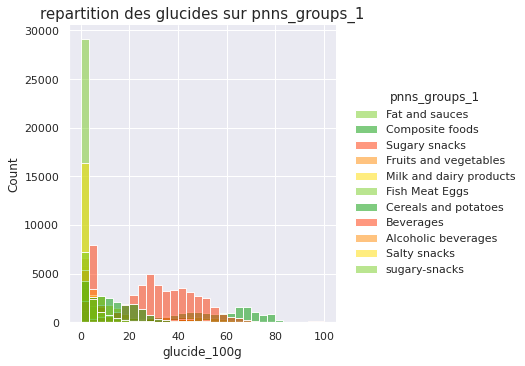

In [ ]:
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(4, 4))
sns.displot(openFoodFile,x="glucide_100g",hue="pnns_groups_1", bins=30)
plt.title(str('repartition des glucides sur pnns_groups_1'),fontsize=15)


<a name="test"></a>
# calcul de l index glycemique

<table class="wikitable">
<tbody><tr>
<th scope="col">Exemple de classification
</th>
<th scope="col">Intervalle de valeurs d'IG
</th>
<th scope="col">Aliments
</th></tr>
<tr>
<td>Indice glycémique faible
</td>
<td>inférieur à 55<sup id="cite_ref-lanutrition_2-1" class="reference"><a href="#cite_note-lanutrition-2"><span class="cite_crochet">[</span>2<span class="cite_crochet">]</span></a></sup>
</td>
<td>La plupart des fruits frais et légumes verts, <a href="/wiki/L%C3%A9gumes_secs" class="mw-redirect" title="Légumes secs">légumes secs</a>, <a href="/wiki/C%C3%A9r%C3%A9ales" class="mw-redirect" title="Céréales">céréales</a> en grains, <a href="/wiki/Riz_complet" title="Riz complet">riz complet</a>, <a href="/wiki/Chocolat" title="Chocolat">chocolat</a> noir riche en cacao, <a href="/wiki/Lait" title="Lait">lait</a> et <a href="/wiki/Produits_laitiers" class="mw-redirect" title="Produits laitiers">produits laitiers</a>(a*)(b*), <a href="/wiki/Viande" title="Viande">viandes</a>, <a href="/wiki/Ol%C3%A9agineux" title="Oléagineux">oléagineux</a>, pain intégral.
</td></tr>
<tr>
<td>Indice glycémique moyen
</td>
<td>Entre 55 et 70<sup id="cite_ref-lanutrition_2-2" class="reference"><a href="#cite_note-lanutrition-2"><span class="cite_crochet">[</span>2<span class="cite_crochet">]</span></a></sup>
</td>
<td>Produits à base de céréales complètes, <a href="/wiki/Pain_complet" title="Pain complet">pain complet</a>, <a href="/wiki/Riz_blanc" title="Riz blanc">riz blanc</a>, <a href="/wiki/Miel" title="Miel">miel</a>, <a href="/wiki/Bananes" class="mw-redirect" title="Bananes">bananes</a>, <a href="/wiki/Raisin_sec" title="Raisin sec">raisins secs</a>, <a href="/wiki/Abricots" class="mw-redirect" title="Abricots">abricots</a> secs, <a href="/wiki/Figue" title="Figue">figues</a> sèches, pommes de terre avec la peau à l'eau ou à la vapeur, chips.
</td></tr>
<tr>
<td>Indice glycémique élevé
</td>
<td>Plus de 70<sup id="cite_ref-lanutrition_2-3" class="reference"><a href="#cite_note-lanutrition-2"><span class="cite_crochet">[</span>2<span class="cite_crochet">]</span></a></sup>
</td>
<td><a href="/wiki/Pain" title="Pain">Pain</a> blanc, pommes de terre pelées, cuites au four ou frites, confiseries, <a href="/wiki/Datte" title="Datte">dattes</a>, <a href="/wiki/Sucre_blanc" class="mw-redirect" title="Sucre blanc">sucre blanc</a>, barres chocolatées, <a href="/wiki/Past%C3%A8que" title="Pastèque">pastèque</a>*(b).
</td></tr>
</tbody></table>

**Index Glycémique : les échelles de valeur**

* IG faibles : < 39
* IG moyens : entre 40 et 59
* IG élevés : > 60

L indice glycémique est présent dans la base mais il est très peu remplis (< 0.02%..)


**Malheureusement après recherche, l indice glycémique d un aliment est très difficile à calculer car chaque aliments doit être tester et mesurer de manière scientifique.
Concrètement l indice glycémique permet a un diabétique de connaître la manière dont l aliment va impacter le taux de glucose dans  l hémoglobine.**


L université de Sydney a commencer sur ce terrain en créant une base de données avec les indices glycémique.

https://glycemicindex.com/gi-search/ 

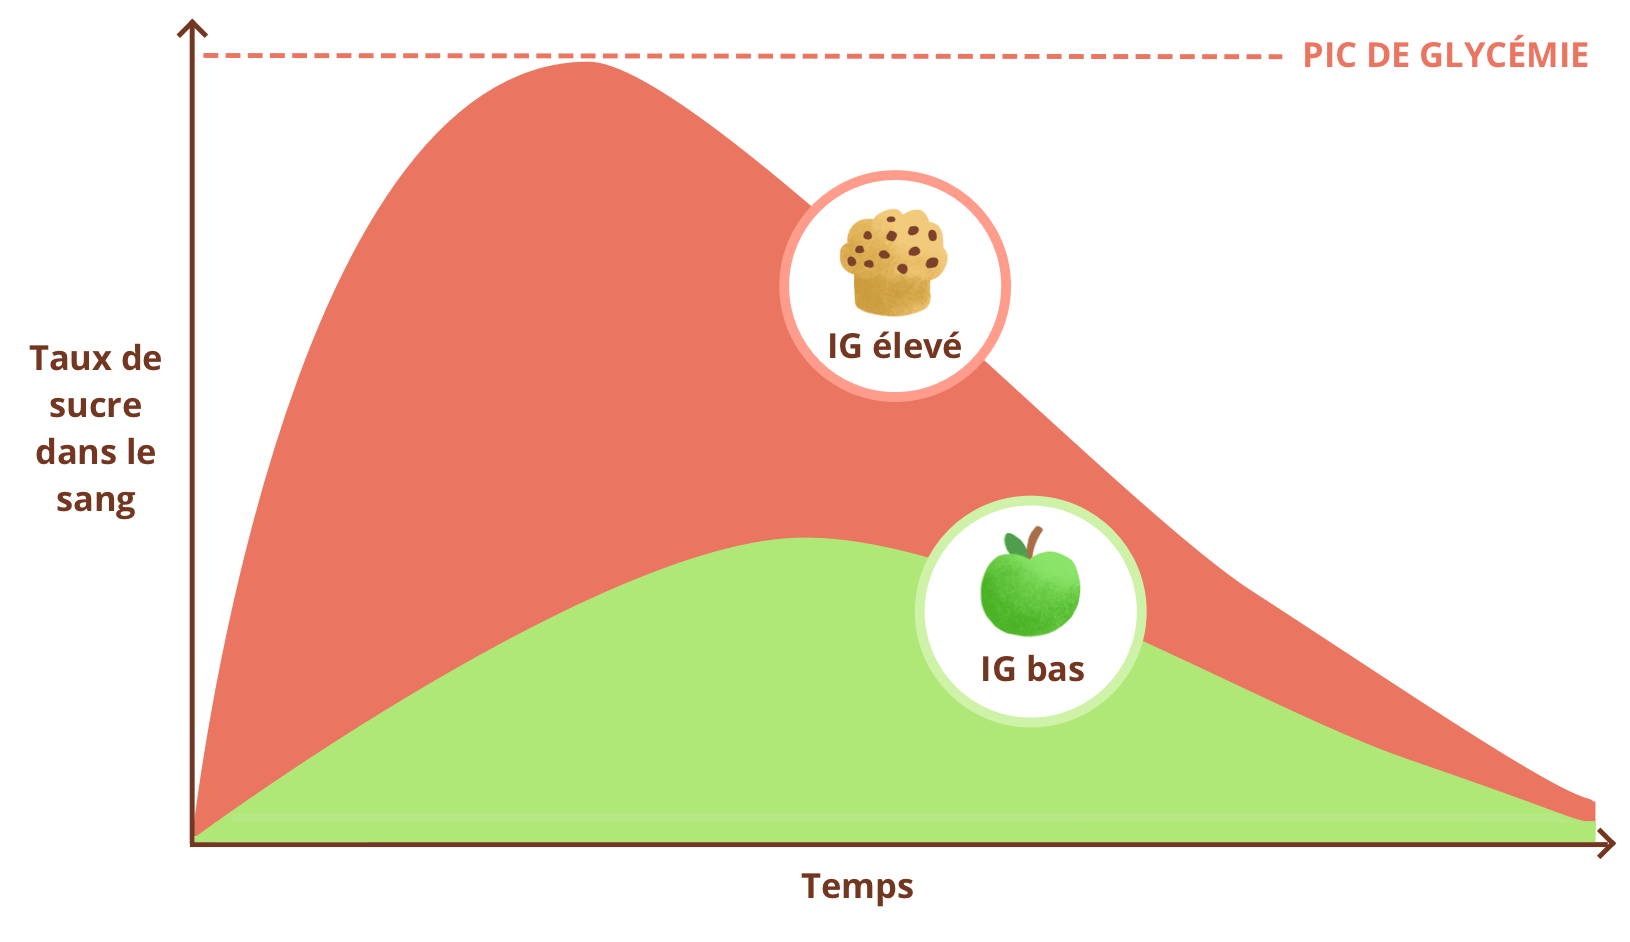

Types de glucides
Il existe deux types de glucides :

* Les glucides simples (sucres) que renferment les aliments comme le lait, les fruits, le sucre, les friandises et le miel,
les glucides complexes (amidon et fibres), que renferment les grains, les légumes et les légumineuses (haricots, pois, etc.).
Certains glucides complexes sont plus bénéfiques que d’autres.

* Les glucides complexes , produits céréaliers non transformés comme le riz brun, le blé entier et l’orge contiennent des fibres, des vitamines et des minéraux. Les produits fabriqués à partir de ces produits comme les pâtes alimentaires de blé entier offrent davantage d’éléments nutritifs par portion.
Les produits céréaliers transformés comme le blé raffiné et le riz blanc, desquels une grande partie des fibres ont été éliminées, contiennent moins de vitamines et de minéraux (par exemple, vitamines B et fer).

# Effets des glucides sur la glycémie
Chaque type de glucides influe différemment sur la glycémie (taux de sucre dans le sang).

* Les céréales non transformées entraînent une légère hausse de la glycémie et la maintiennent plus longtemps à des valeurs stables. Ce phénomène est en partie dû au fait que les céréales contiennent davantage de fibres solubles qui forment des gels au contact de l’eau ou d’autres liquides. Les fibres solubles aident à maintenir la glycémie et prolonge la sensation de satiété.
* Les glucides simples et les céréales transformées peuvent causer une forte hausse de courte durée du taux de sucre dans le sang appelé « pic » de glycémie. Ce phénomène entraîne un « pic » d’énergie, qui est aussi de courte durée.

Les groupes des légumes et des fruits et des produits céréaliers offrent d’excellentes sources de fibres.




<a name="gluci"></a>

# calcul du gluciscore

* Nous allons donc essayer de calculer un glucide_score de manière manuelle, comme vous avez pu le lire ci dessus , il seras difficile d avoir un résultat satisfaisant , mais nous allons essayé.

* Nous allons raisonner en terme de poids , un aliment qui faire partie d un groupe de catégorie connu comme le céréale aura une bon poid (score) par exemple, alors qu'au contraire si le produit fait partie d une catégorie connu comme mauvaise le score seras petit.



In [11]:
glycide_ind = {}
glycide_ind['Sugary snacks'] = 'elever'
glycide_ind['Fish Meat Eggs'] = 'faible'
glycide_ind['Milk and dairy products'] = 'elever'
glycide_ind['Composite foods'] = 'moyenne'
glycide_ind['Cereals and potatoes'] = 'moyenne'
glycide_ind['Beverages'] = 'faible'
glycide_ind['Fruits and vegetables'] = 'faible'
glycide_ind['Salty snacks'] = 'elever'
glycide_ind['Alcoholic beverages'] = 'elever'
glycide_ind['Fat and sauces'] = 'elever'

## Systeme de bonus malus pour le calcul des glucides
glycide_val = {}
glycide_val['Sugary snacks'] = 5
glycide_val['Fish Meat Eggs'] = 10
glycide_val['Milk and dairy products'] = 15
glycide_val['Composite foods'] = 5
glycide_val['Cereals and potatoes'] = 20
glycide_val['Beverages'] = 5
glycide_val['Fruits and vegetables'] = 20
glycide_val['Salty snacks'] = 15
glycide_val['Alcoholic beverages'] = 15
glycide_val['Fat and sauces'] = 5

In [12]:
#suppression d une ligne isoler probablement a cause de l importation du fichier...
openFoodFile = openFoodFile[(openFoodFile.pnns_groups_1 != 'sugary-snacks') & ~(openFoodFile['pnns_groups_1'].isna())]

In [13]:
openFoodFile["pnns_groups_1"] .value_counts()

Sugary snacks              44719
Fish Meat Eggs             33077
Milk and dairy products    26846
Composite foods            21616
Cereals and potatoes       19373
Beverages                  18358
Fruits and vegetables      15293
Salty snacks               13508
Fat and sauces             12973
Alcoholic beverages         3793
Name: pnns_groups_1, dtype: int64

In [14]:
openFoodFile.columns

Index(['Unnamed: 0', 'code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'labels', 'labels_tags',
       'labels_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates

**Proposition d analyse de l application** :

Nous avons ici developper un algorithme permettant de créer des categories classé suivant leur taux de glucides.


Pour repondre aux besoins des diabetiques , 
  * hypoglycémie : il faudrait anticiper les moments ou ces personnes ont **un besoin rapide en glucide du à leur glycemie**, et leur proposer un aliments pour combler ce manque (glucides simples)
  * Dans l autre cas ou les diabetiques sont dans un etat stable les aider a manger **des aliments avec moins de glucides** (glucides complexe)
  * hyperglycémie : dans ce cas nous conseillerons des aliments sans glucides (legumes, poissons, eau...)

In [15]:
# cette algorithme va calculer un gluciscore en fonction de :
# les valeurs nutrionnels des differents type d aliments
# en fonction d une interval arbitraire glanez chez un nutritioniste
# ajout d un bonus glucides en fonction de la categories ciblé
def calcul_gluciscore(row):
    #Sugar
    if row["sugars_100g"] <= 4.5:
        sugar = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        sugar = 5
    else:
        sugar = 10
    #saturated-fat
    if row["saturated-fat_100g"] <= 1:
        saturated_fat = 0
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        saturated_fat = 5
    else:
        saturated_fat = 10
    #fiber
    if row["fiber_100g"] <= 0.7:
        fiber = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        fiber = -2
    else:
        fiber = -5
    #proteins
    if ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        proteins = -2
    else:
        proteins = -5
    #carbohydrate
    if row["glucide_100g"] <= 40:
        glucide = 0
    elif ((row["glucide_100g"] > 40) & (row["glucide_100g"] <= 80)):
        glucide = -2
    else:
        glucide = -5
    global_score = sugar+saturated_fat+fiber+proteins+ glycide_val[row['pnns_groups_1']]
    
    return global_score  

#gluciscore_grade
def grade_glucide(row):
  if((row["gluciscore"] >= 20)):
    score = "a"
  elif ((row["gluciscore"] >= 12) & (row["gluciscore"] < 20)):
    score = "b"
  elif ((row["gluciscore"] >= 6) & (row["gluciscore"] < 12)):
    score = "c"    
  elif ((row["gluciscore"] >= 0) & (row["gluciscore"] < 6)):
    score = "d"
  else:
    score="e"      
  return score 

#gluciscore_grade
def grade_glucide_inv(row):
  if((row["gluciscore"] >= 20)):
    score = "e"
  elif ((row["gluciscore"] >= 12) & (row["gluciscore"] < 20)):
    score = "d"
  elif ((row["gluciscore"] >= 6) & (row["gluciscore"] < 12)):
    score = "c"    
  elif ((row["gluciscore"] >= 0) & (row["gluciscore"] < 6)):
    score = "b"
  else:
    score="a"      
  return score   

# openFoodFile['indice_glucide'] = openFoodFile.apply(lambda row: indiceGlucides(row),axis=1)
# openFoodFile['indice_glucide2'] = openFoodFile.apply(lambda row: indiceGlucides2(row),axis=1)
openFoodFile['gluciscore'] = openFoodFile.apply(lambda row: calcul_gluciscore(row),axis=1)
openFoodFile['gluciscore_grade'] = openFoodFile.apply(lambda row: grade_glucide(row),axis=1)
openFoodFile['gluciscore_grade_inv'] = openFoodFile.apply(lambda row: grade_glucide_inv(row),axis=1)

In [16]:
openFoodFile['gluciscore_grade'].value_counts()

b    72571
d    57518
c    40407
a    30183
e     8877
Name: gluciscore_grade, dtype: int64

In [17]:
openFoodFile['gluciscore_grade_classic'] = pd.qcut(openFoodFile['gluciscore'],5, duplicates='drop',labels=['a','b', 'c', 'd', 'e',])
openFoodFile['gluciscore_grade_classic'].value_counts()

a    66395
c    45963
b    39003
e    30183
d    28012
Name: gluciscore_grade_classic, dtype: int64

<a name="multi"></a>
# Analyse multivariées

Text(0.5, 1.0, 'repartition des glucide_100g sur gluciscore_grade')

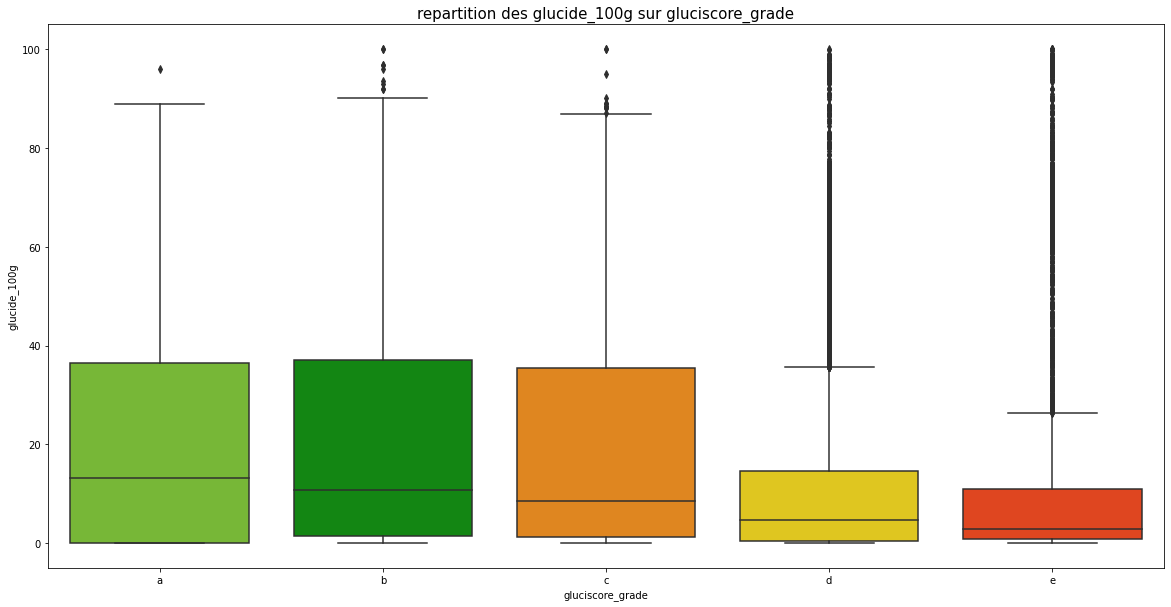

In [18]:
from matplotlib import rcParams
sns.set_palette(sns.color_palette(colors))
# figure size in inches
rcParams['figure.figsize'] = 20,10
# Find the order
my_order = openFoodFile.groupby(by=["gluciscore_grade"]).count().index
sns.boxplot(x = 'gluciscore_grade', y = 'glucide_100g', data = openFoodFile, order=my_order)
plt.title(str('repartition des glucide_100g sur gluciscore_grade'),fontsize=15)

L algotrithme des scores des glucides marchent correctement car la repartition des glusiscores est bien fait sur les glucides , il faudra garder en tete d avoir une aide  dun nutritioniste afin d ameliorer l algorithme

ici on affiche le gluciscore inverver

Text(0.5, 1.0, 'repartition des glucide_100g sur gluciscore_grade inverser')

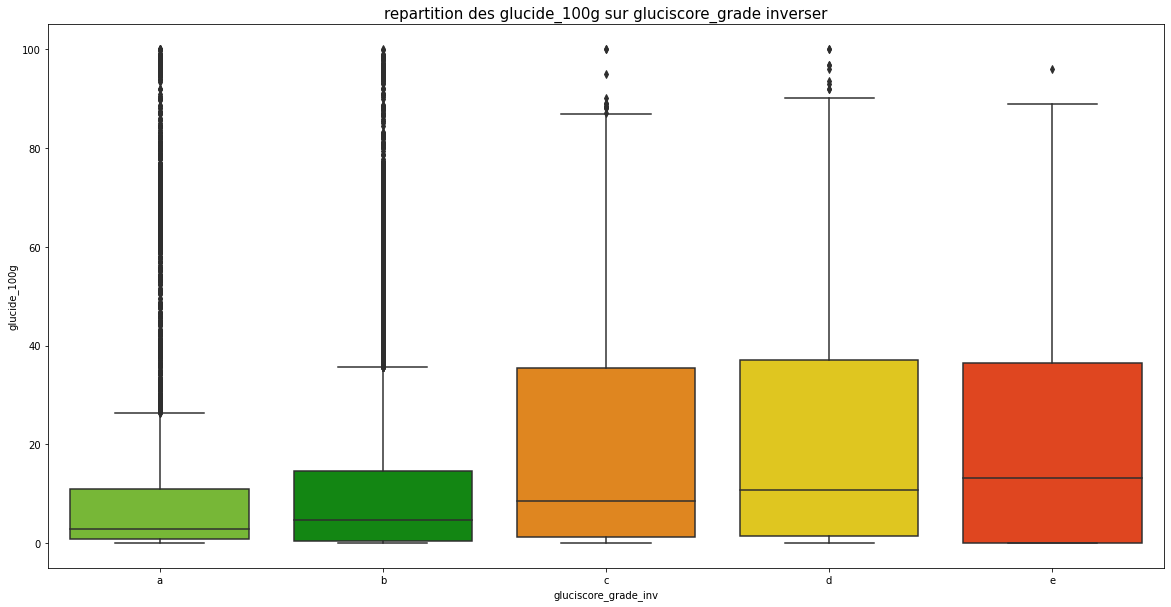

In [158]:
from matplotlib import rcParams
sns.set_palette(sns.color_palette(colors))
# figure size in inches
rcParams['figure.figsize'] = 20,10
# Find the order
my_order = openFoodFile.groupby(by=["gluciscore_grade_inv"]).count().index
sns.boxplot(x = 'gluciscore_grade_inv', y = 'glucide_100g', data = openFoodFile, order=my_order)
plt.title(str('repartition des glucide_100g sur gluciscore_grade inverser'),fontsize=15)

In [ ]:
#on aurait put egalement faire un qcut repartie sur les donnees des glucides ordonner
#mais on ne prendra en compte les autres valeurs nutrionnels de l aliment...
# openFoodFile['categories_nutriscore'] = pd.qcut(openFoodFile['nutriscore_score'],5, duplicates='drop',labels=['e', 'd', 'c', 'b','a'])
# openFoodFile['categories_gluciscide'] = pd.qcut(openFoodFile['glusiscore_sc'],5, duplicates='drop',labels=['e', 'd', 'c', 'b','a'])

Text(0.5, 1.0, 'repartition des gluciscore sur gluciscore_grade')

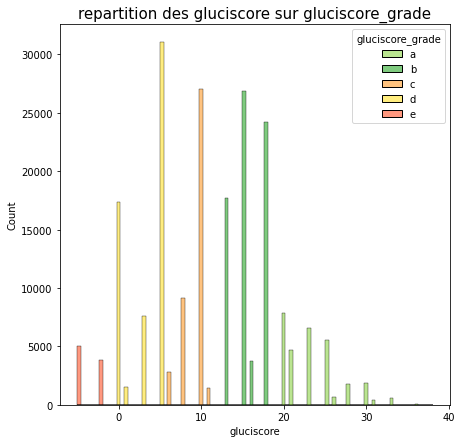

In [159]:
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(7, 7))
sns.histplot(data=openFoodFile,x="gluciscore",hue="gluciscore_grade")
plt.title(str('repartition des gluciscore sur gluciscore_grade'),fontsize=15)

In [37]:
pd.crosstab(openFoodFile['gluciscore_grade'],openFoodFile['pnns_groups_1'])

pnns_groups_1     Alcoholic beverages  Beverages  Cereals and potatoes  \
gluciscore_grade                                                         
a                                3138         29                  5270   
b                                  79       1720                  9196   
c                                 158       1113                  4907   
d                                 418      12808                     0   
e                                   0       2688                     0   

pnns_groups_1     Composite foods  Fat and sauces  Fish Meat Eggs  \
gluciscore_grade                                                    
a                             116              13            1299   
b                            1062             969            2078   
c                            5045            3151           12406   
d                           11527            7205           17294   
e                            3866            1635               0   

pnns_groups_1     Fruits and vegetables  Milk and dairy products  \
gluciscore_grade                                                   
a                                  5610                     8097   
b                                  7880                    17757   
c                                  1803                      777   
d                                     0                      215   
e                                     0                        0   

pnns_groups_1     Salty snacks  Sugary snacks  
gluciscore_grade                               
a                         2359           4252  
b                         8527          23303  
c                         2274           8773  
d                          348           7703  
e                            0            688

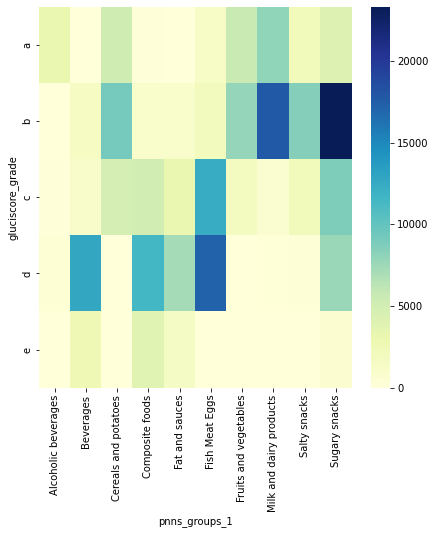

In [78]:
palette = sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(7, 7))
sns.heatmap(pd.crosstab(openFoodFile['gluciscore_grade'],openFoodFile['pnns_groups_1']), cmap="YlGnBu")
# plt.title(str('croisement des gluciscore_grade avec pnns_group1'),fontsize=10, y=1.08)

# plt.ylabel('croisement des gluciscore_grade avec pnns_group1', va="baseline", fontsize=12, rotation=0,y=1.05,x=)

Ce tableau croisée est interessant , car il permet de voir le type de groupes repartis en fonction du gluciscore , la categorie <code>Cereals and potatoes</code> et <code>Fruits and vegetables</code> ne font pas partie des categories d et e.

le lait est repartis plutot sur le glusicore a et b


Text(0.5, 1.0, 'repartition des gluciscore sur pnns_groups_1')

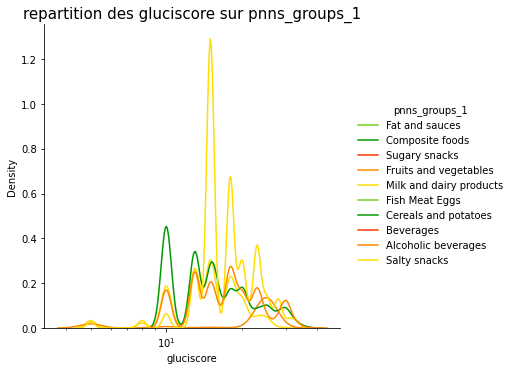

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.color_palette("Spectral", as_cmap=True)
# sns.set_palette(sns.color_palette(colors))
sns.displot(data=openFoodFile,x="gluciscore",hue="pnns_groups_1",kind="kde", log_scale=True)
plt.title(str('repartition des gluciscore sur pnns_groups_1'),fontsize=15)

Text(0.5, 1.0, 'repartition des glucide_100g sur pnns_groups_1')

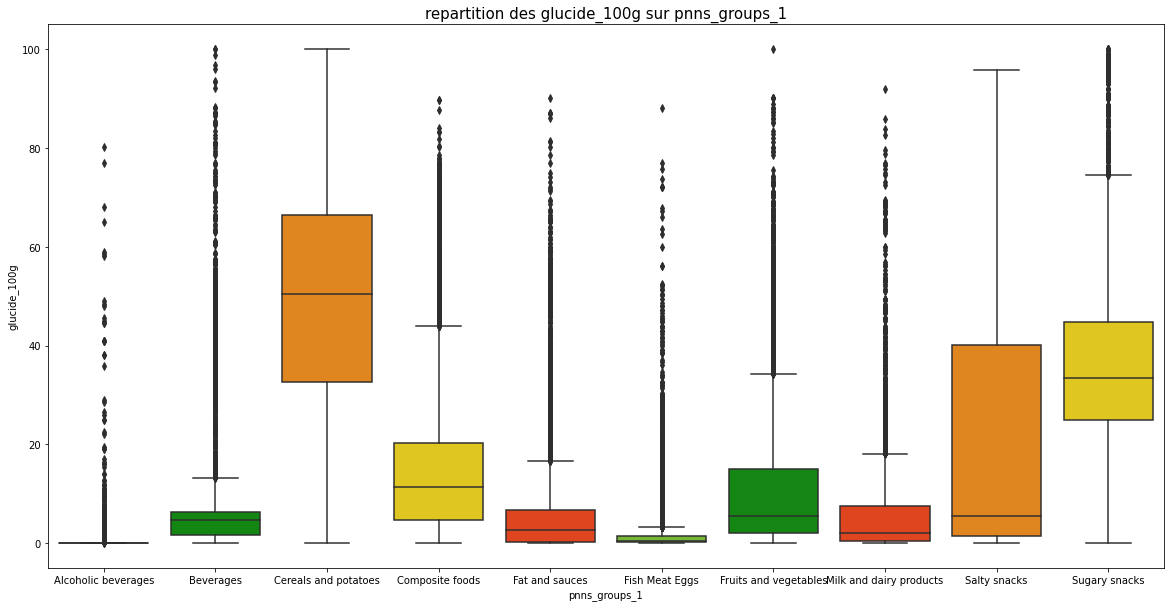

In [79]:
from matplotlib import rcParams
sns.set_palette(sns.color_palette(colors))
# figure size in inches
rcParams['figure.figsize'] = 20,10
# Find the order
my_order = openFoodFile.groupby(by=["pnns_groups_1"]).count().index
sns.boxplot(x = 'pnns_groups_1', y = 'glucide_100g', data = openFoodFile, order=my_order)
plt.title(str('repartition des glucide_100g sur pnns_groups_1'),fontsize=15)

Pour le groupe <code>pnns_groups_1</code> , on remarque que les groupes

  * <code>Cereals and potatoes</code>
  * <code>Fruits and vegetables</code>
  * <code>Salty snacks </code>
  * <code>Sugary snacks </code>
  * <code>Composite foods</code>

Contiennent beaucoup de **glucides**, nous avons des informations tres interessante car notre application pourra ce base sur l information des groupes de <code>pnns_groups_1</code>


In [146]:
from pandas.core.indexes import category
openFoodFile['gluciscore_grade'] = openFoodFile['gluciscore_grade'].astype('category')
# openFoodFile['glusiscore'] = openFoodFile['glusiscore'].astype('float64')

Text(0.5, 1.0, 'repartition gluciscore par pnns_groups_1')

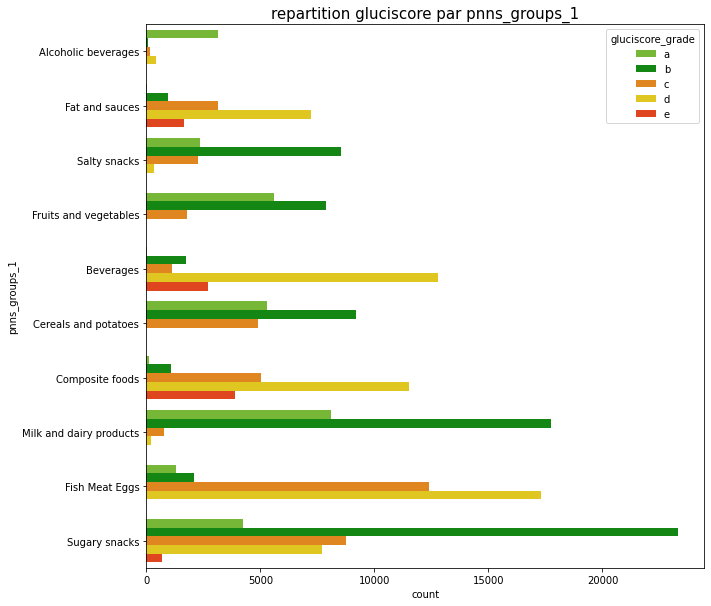

In [151]:
plt.figure(figsize=(10,10))
ordre_quartier = openFoodFile.groupby('pnns_groups_1')['gluciscore_grade'].count().sort_values().index
sns.countplot(y="pnns_groups_1",hue="gluciscore_grade",data=openFoodFile, order=ordre_quartier)
plt.title(str('repartition gluciscore par pnns_groups_1'),fontsize=15)

Des informations utiles egalement : 
  * Sugary snack contient une majorite de glusicore b
  * le poisson contiennent tres peu de glucides
  * les fruits beaucoups 


Avec toute ces informations , nous pouvez deja commencer à imaginer un algorithme de recommendation.

In [ ]:
openFoodFile.columns

Index(['Unnamed: 0', 'code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_fr', 'labels', 'labels_tags',
       'labels_fr', 'countries', 'countries_tags', 'countries_fr',
       'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n',
       'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_fr', 'main_category',
       'main_category_fr', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates

Text(0.5, 1.0, 'repartition gluciscore par pnns_groups_1')

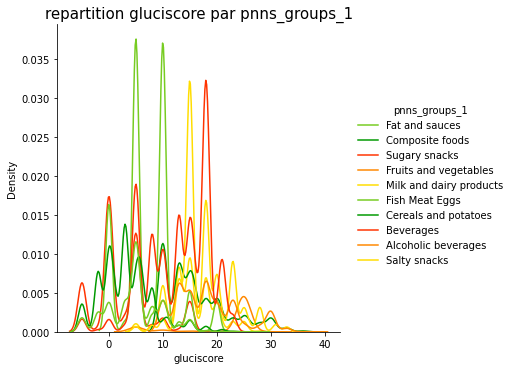

In [ ]:
sns.displot(data=openFoodFile,x="gluciscore",hue="pnns_groups_1",kind="kde", log_scale=False)
plt.title(str('repartition gluciscore par pnns_groups_1'),fontsize=15)

Text(0.5, 1.0, 'repartition nutriscore_score par pnns_groups_1')

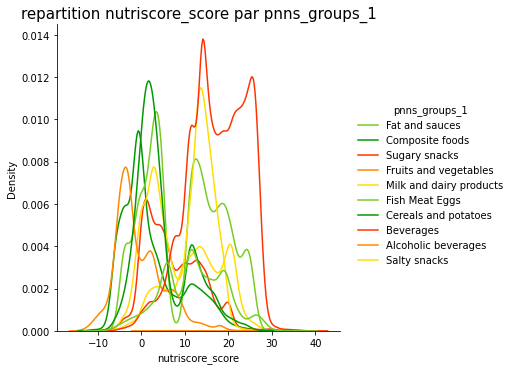

In [ ]:
sns.displot(data=openFoodFile,x="nutriscore_score",hue="pnns_groups_1",kind="kde", log_scale=False)
plt.title(str('repartition nutriscore_score par pnns_groups_1'),fontsize=15)

Text(0.5, 1.0, 'repartition pnns_groups_1')

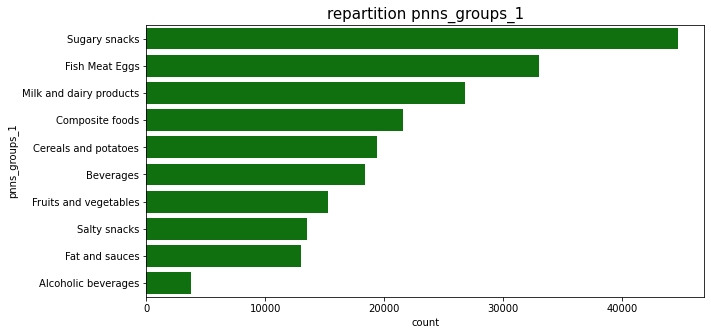

In [156]:
plt.figure(figsize=(10,5))
order = openFoodFile['pnns_groups_1'].value_counts().index
sns.countplot(y='pnns_groups_1',order=order,data=openFoodFile,color='green')
plt.title(str('repartition pnns_groups_1'),fontsize=15)

Text(0.5, 1.0, 'repartition pnns_groups_2')

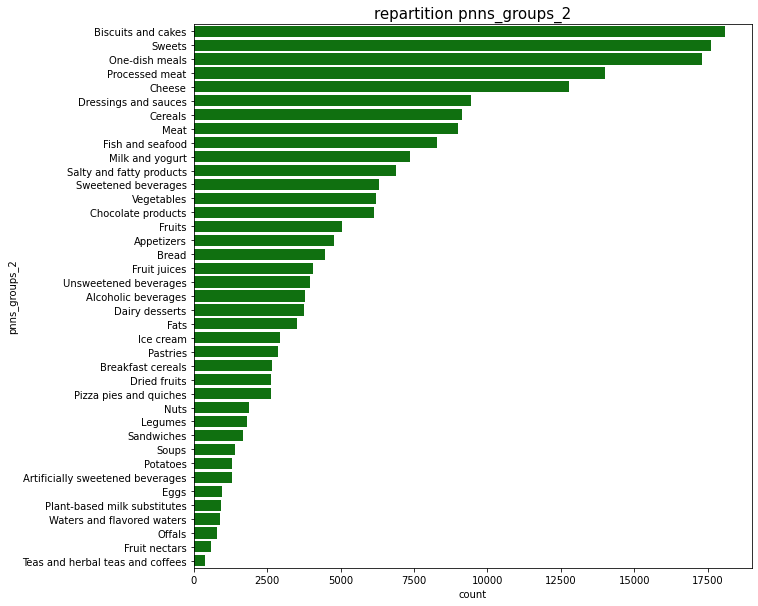

In [160]:
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize=(10,10))
order = openFoodFile['pnns_groups_2'].value_counts().index
sns.countplot(y='pnns_groups_2',order=order,data=openFoodFile,color='green')
plt.title(str('repartition pnns_groups_2'),fontsize=15)

Nous allons maintenant croiser toutes nos variables quantitatives , avec nos variables qualitatives pnns_group_1 et pnns_group_2

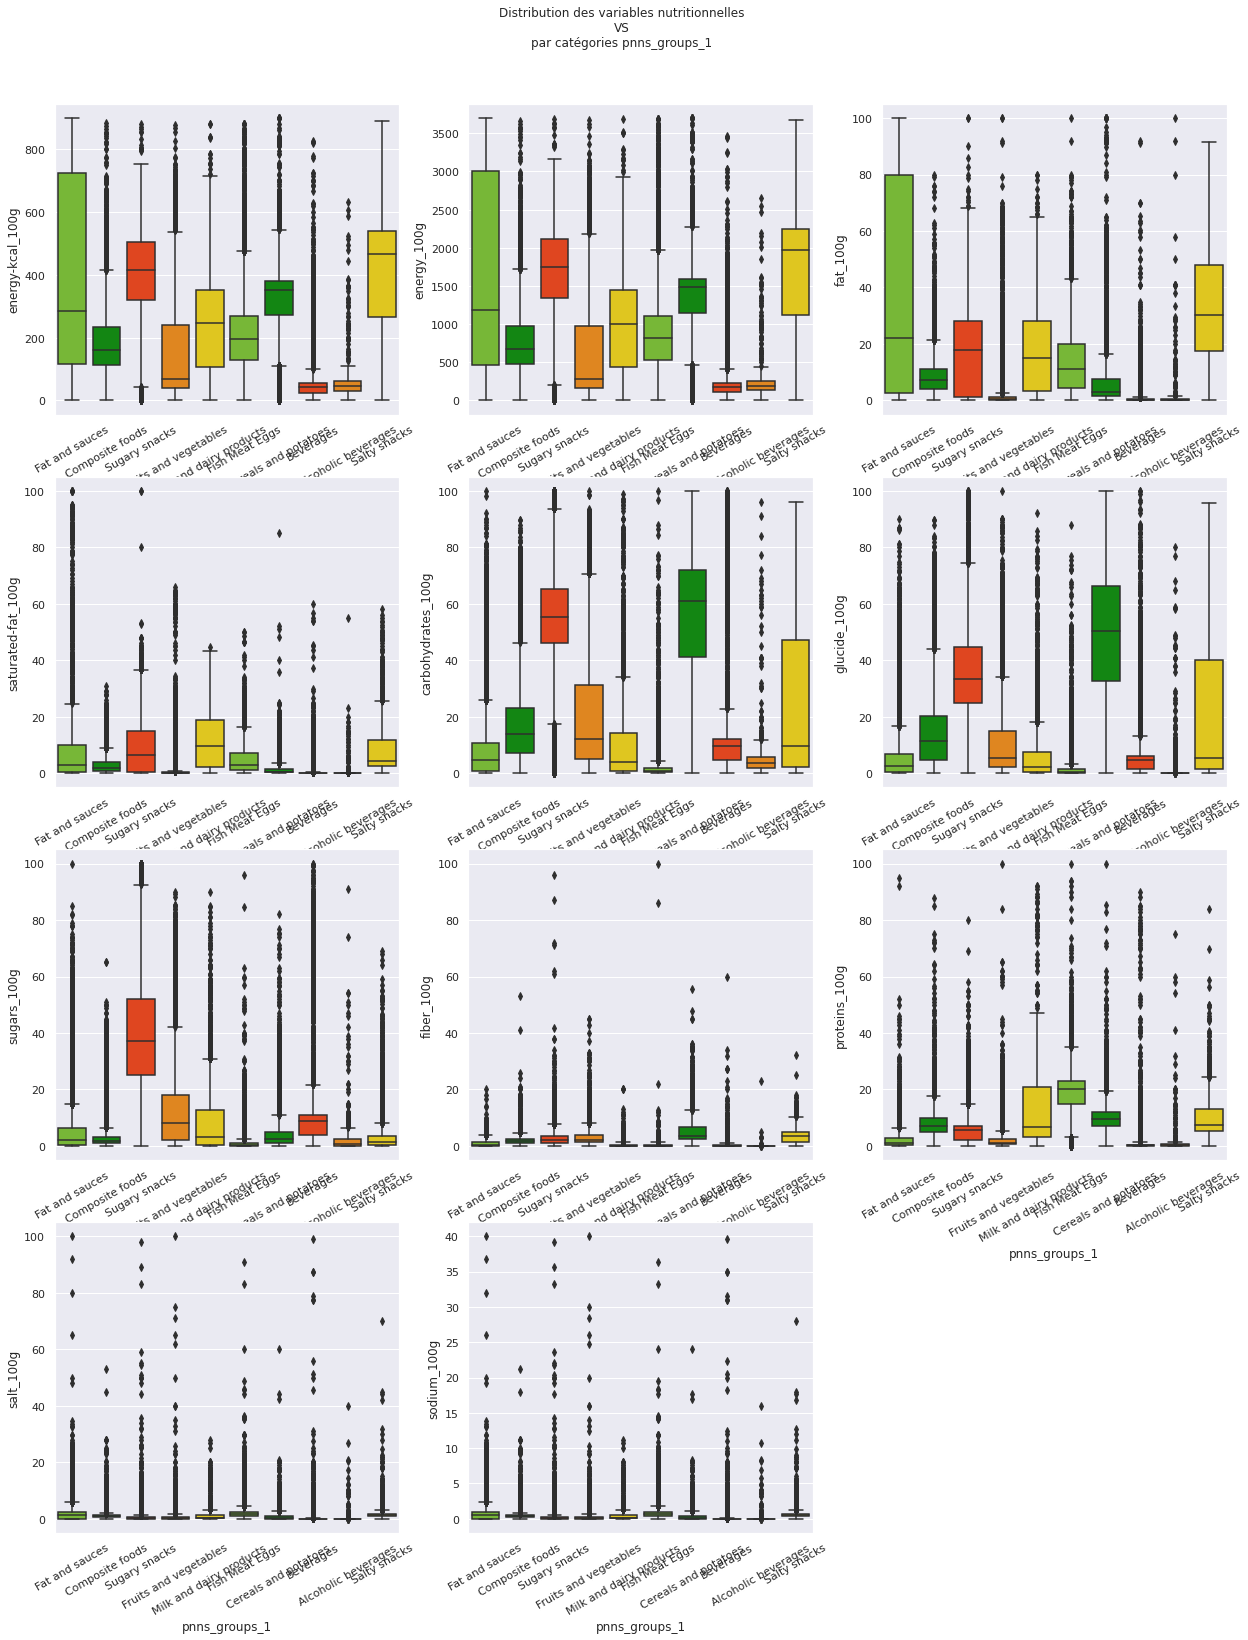

In [ ]:
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(21,40))
columntocheck = [
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'glucide_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 ]
for i in range(len(columntocheck)):
    fig.add_subplot(6,3,i+1)
    col = columntocheck[i]
    ax = sns.boxplot(x="pnns_groups_1", y=col, data=openFoodFile)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "VS" "\n" "par catégories pnns_groups_1", ha="center")
plt.show()




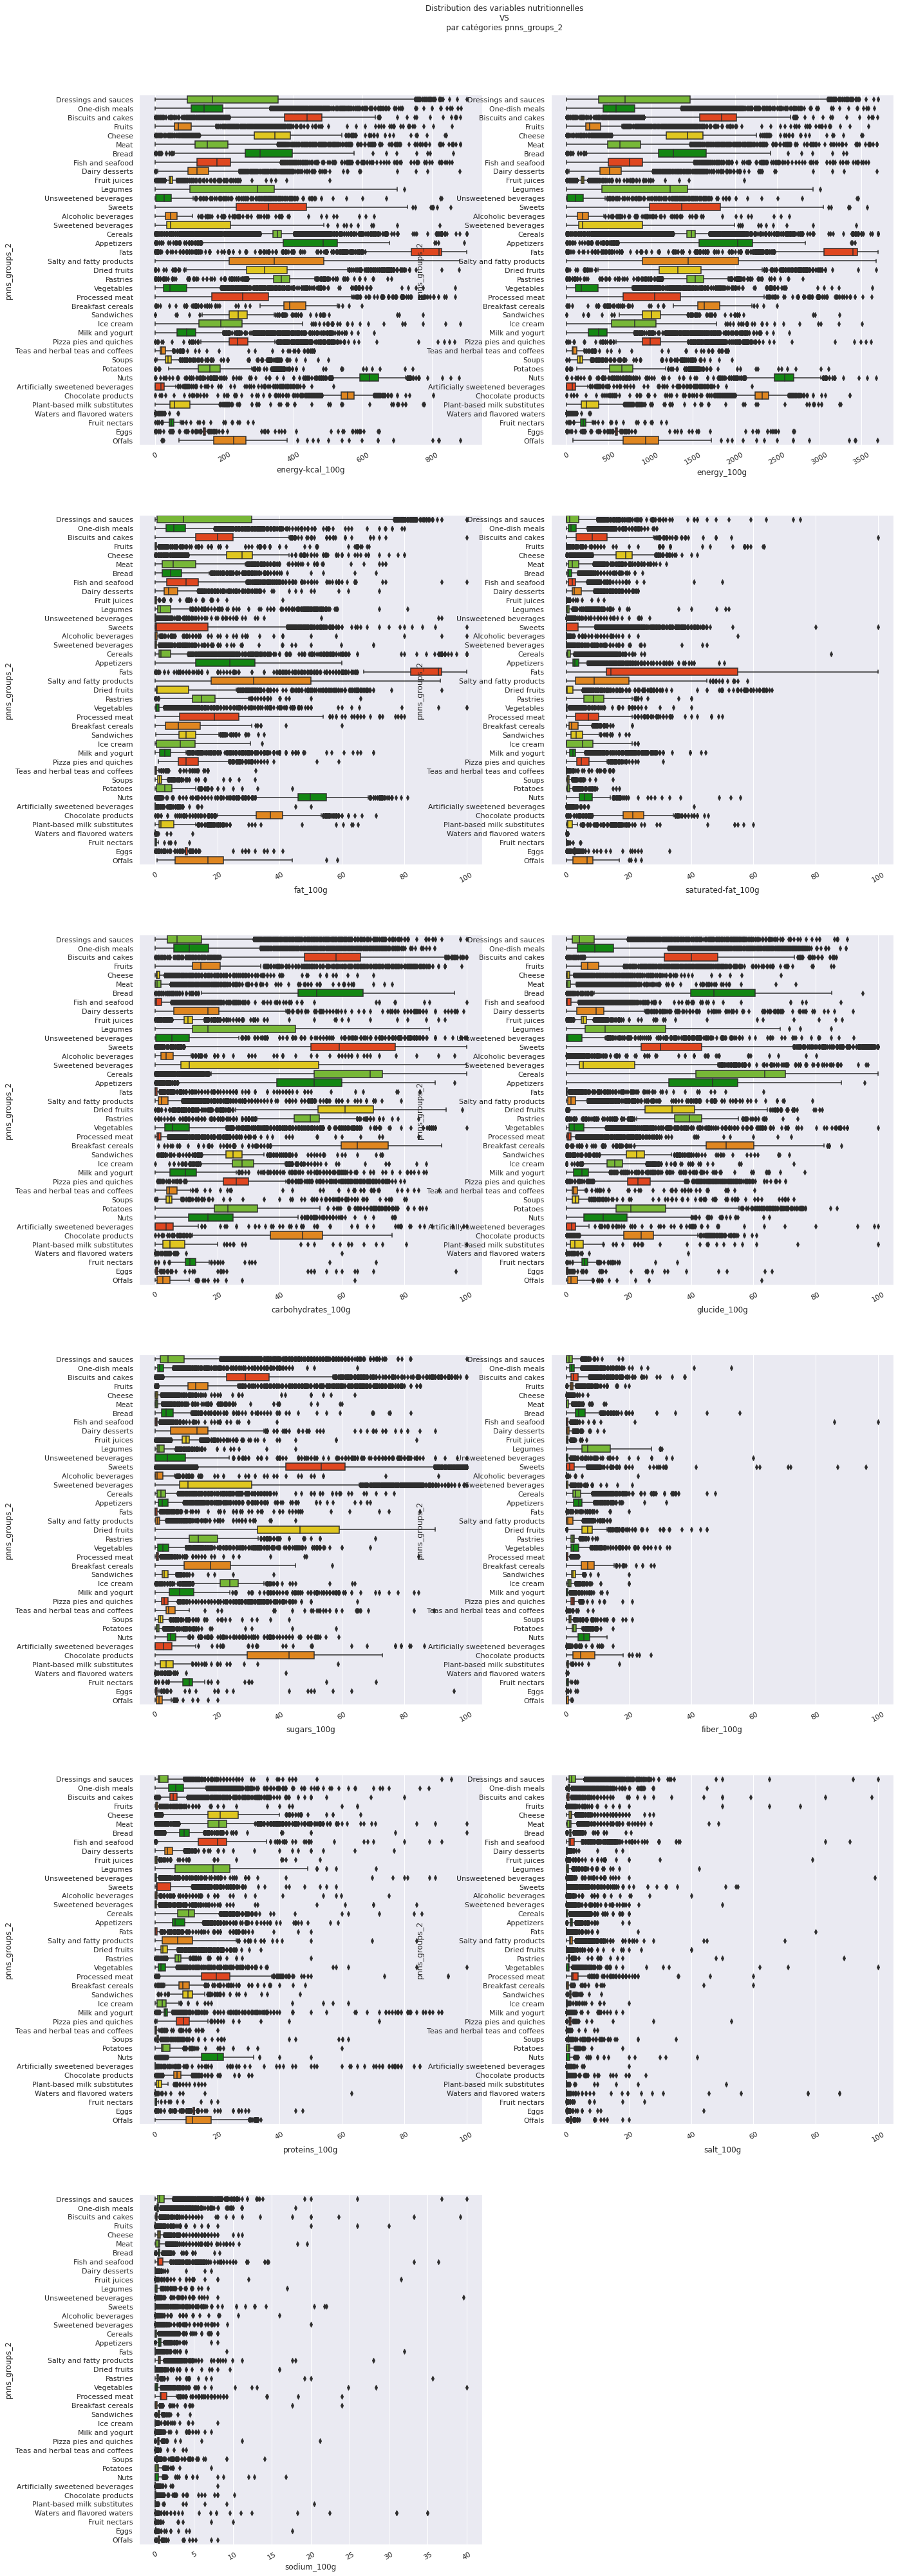

In [ ]:
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(21,70))
sub = 0
for i in range(len(columntocheck)):
    fig.add_subplot(6,2,i+1)
    col = columntocheck[i]
    ax = sns.boxplot(y="pnns_groups_2", x=col, data=openFoodFile)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1
fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "VS" "\n" "par catégories pnns_groups_2", ha="center")
plt.show()

Dans cette section , c'est le jackpot  car , **nous avons un detail du type d aliments repartis sur les donnees nutritionnels**, il nous donne des informations très precieuse , grâce à ces informations nous pouvons imaginer developper un algorithme de recommandations .

  * il pourra privilegier les aliments à fort valeur glucidique (gluciscore)
  * et en meme temp avoir un classement de la qualite du produit, la qualite seras une valeur arbitraire donner par un nutritioniste(glucide simple et complexe)
  

  En fonction du besoin du diabetique , l application pourra lui proposer soit un aliments riche en glucides pour eviter le glycemie.
  ou au contraire l eviter

Nous pouvons remarquer que le **gluciscore est correller a l'energie et la graisse**, dans le graphique ci-dessous

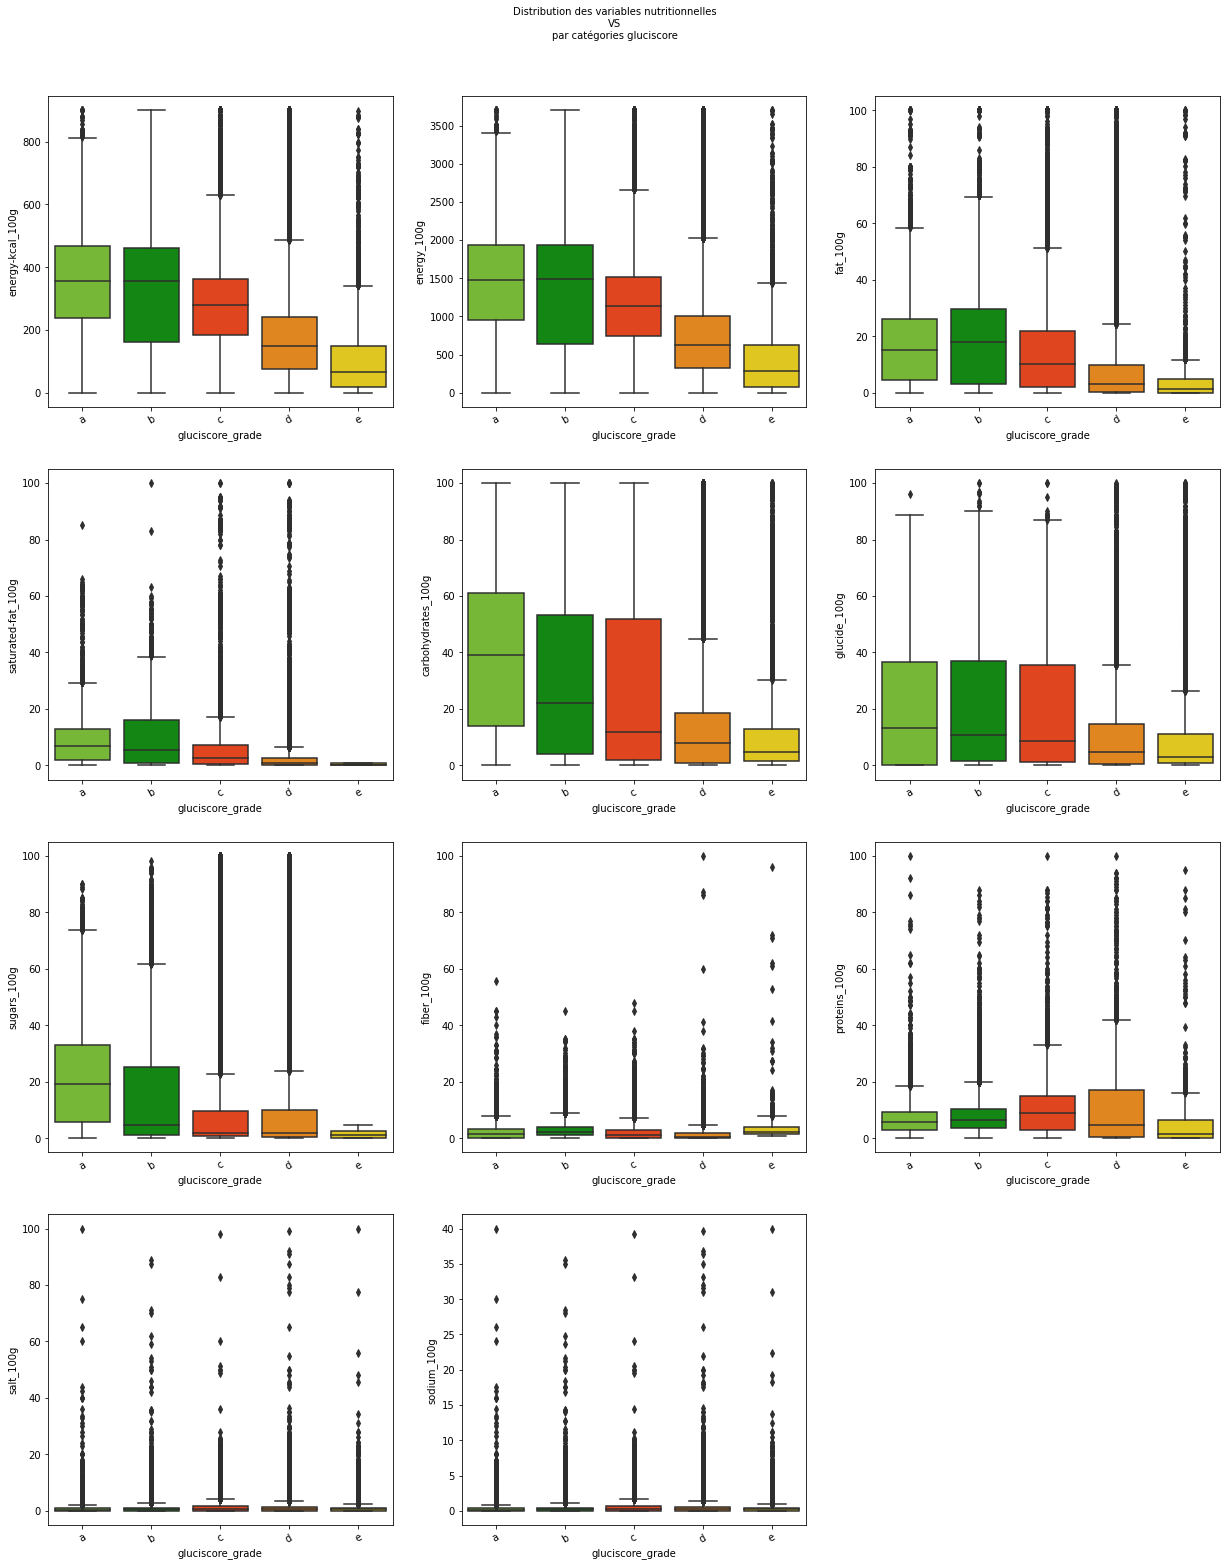

In [ ]:
sns.set_palette(sns.color_palette(colors))
fig = plt.figure(figsize=(21,40))
columntocheck = [
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'glucide_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 ]
sub = 0
for i in range(len(columntocheck)):
    fig.add_subplot(6,3,i+1)
    col = columntocheck[i]
    ax = sns.boxplot(x="gluciscore_grade", y=col, data=openFoodFile)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "VS" "\n" "par catégories gluciscore", ha="center")
plt.show()

<a name="gini"></a>
## Mesures de concentration 

**Aire de Gini**

colonne **glucides**

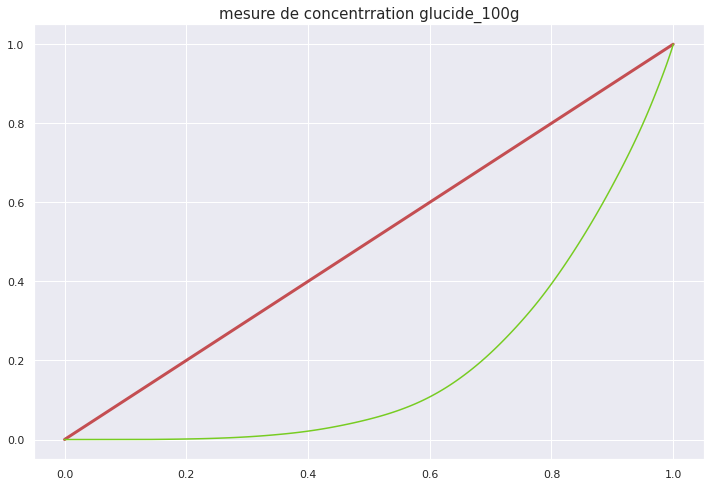

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,8))
sns.set_palette(sns.color_palette(colors))
energie = openFoodFile[(openFoodFile['glucide_100g'] < 100)]
dep = energie['glucide_100g'].values
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
#show y=Y courb
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='r', lw=3, scalex=False, scaley=False)
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.title(str('mesure de concentrration glucide_100g'),fontsize=15)
plt.show()

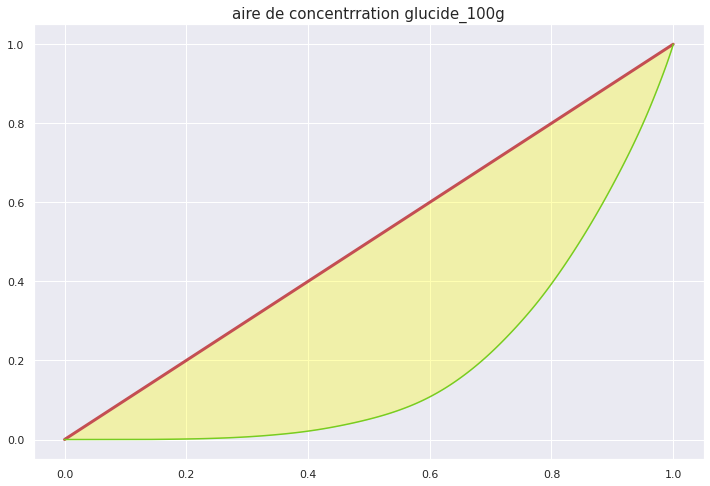

In [ ]:
#on trace la droite d egalite
fig = plt.figure(figsize=(12,8))
sns.set_palette(sns.color_palette(colors))
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='r', lw=3, scalex=False, scaley=False)
# on trace la courbe de lorenz
plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
#on rempli l air de la courbe de lorenz
plt.fill(np.linspace(0,1,len(lorenz)), lorenz,  alpha=0.3, color="yellow")
# plt.grid()
# plt.title(str('Lorenz courbe with area'),fontsize=10)
# plt.savefig('how_to_fill_area_matplotlib_06.png', bbox_inches='tight')
plt.title(str('aire de concentrration glucide_100g'),fontsize=15)
plt.show()
# plt.close()

In [ ]:
aire_ss_courbe = lorenz[:-1].sum()/len(lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
print('aire de gini  {} '.format(gini))   

aire de gini  0.6190368314738456 


Text(0.5, 1.0, 'repartition des gluciscore')

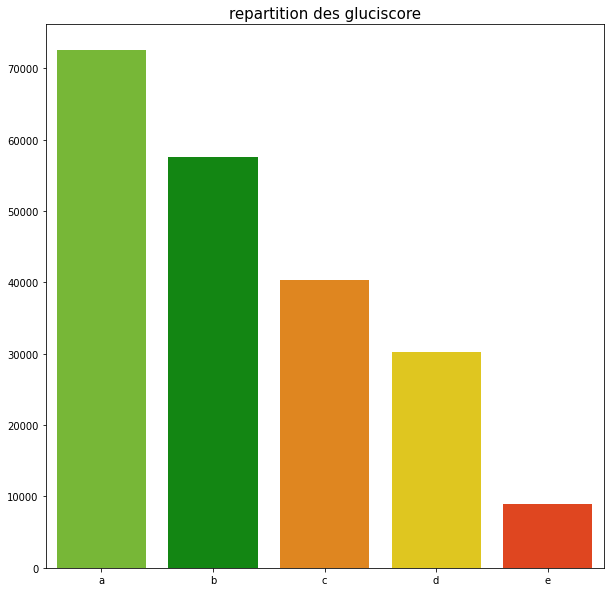

In [157]:
test = openFoodFile['gluciscore_grade'].value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=sorted(test.index),y=test.values)
plt.title(str('repartition des gluciscore'),fontsize=15)

Text(0.5, 1.0, 'repartion des glucide_100g sur pnns_groups_2')

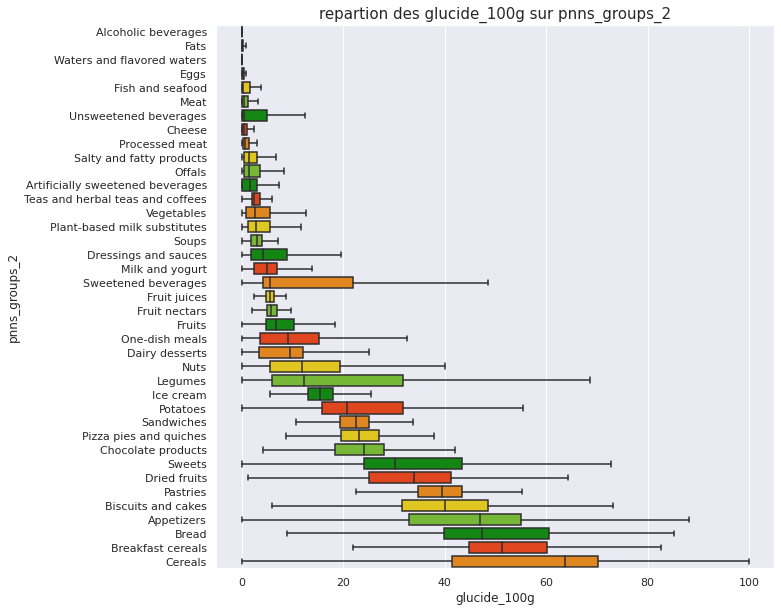

In [ ]:
plt.figure(figsize=(10,10))
tmp2 = openFoodFile
order_area = tmp2.groupby('pnns_groups_2')['glucide_100g'].median().sort_values().index
sns.boxplot(x='glucide_100g',
            y='pnns_groups_2',
            showfliers=False,
            orient='h',
            order=order_area,
            data=tmp2
           )
plt.title(str('repartion des glucide_100g sur pnns_groups_2'),fontsize=15)

Text(1.0, 1.0, 'Mains nutriments according to categories_gluciscore')

<Figure size 288x288 with 0 Axes>

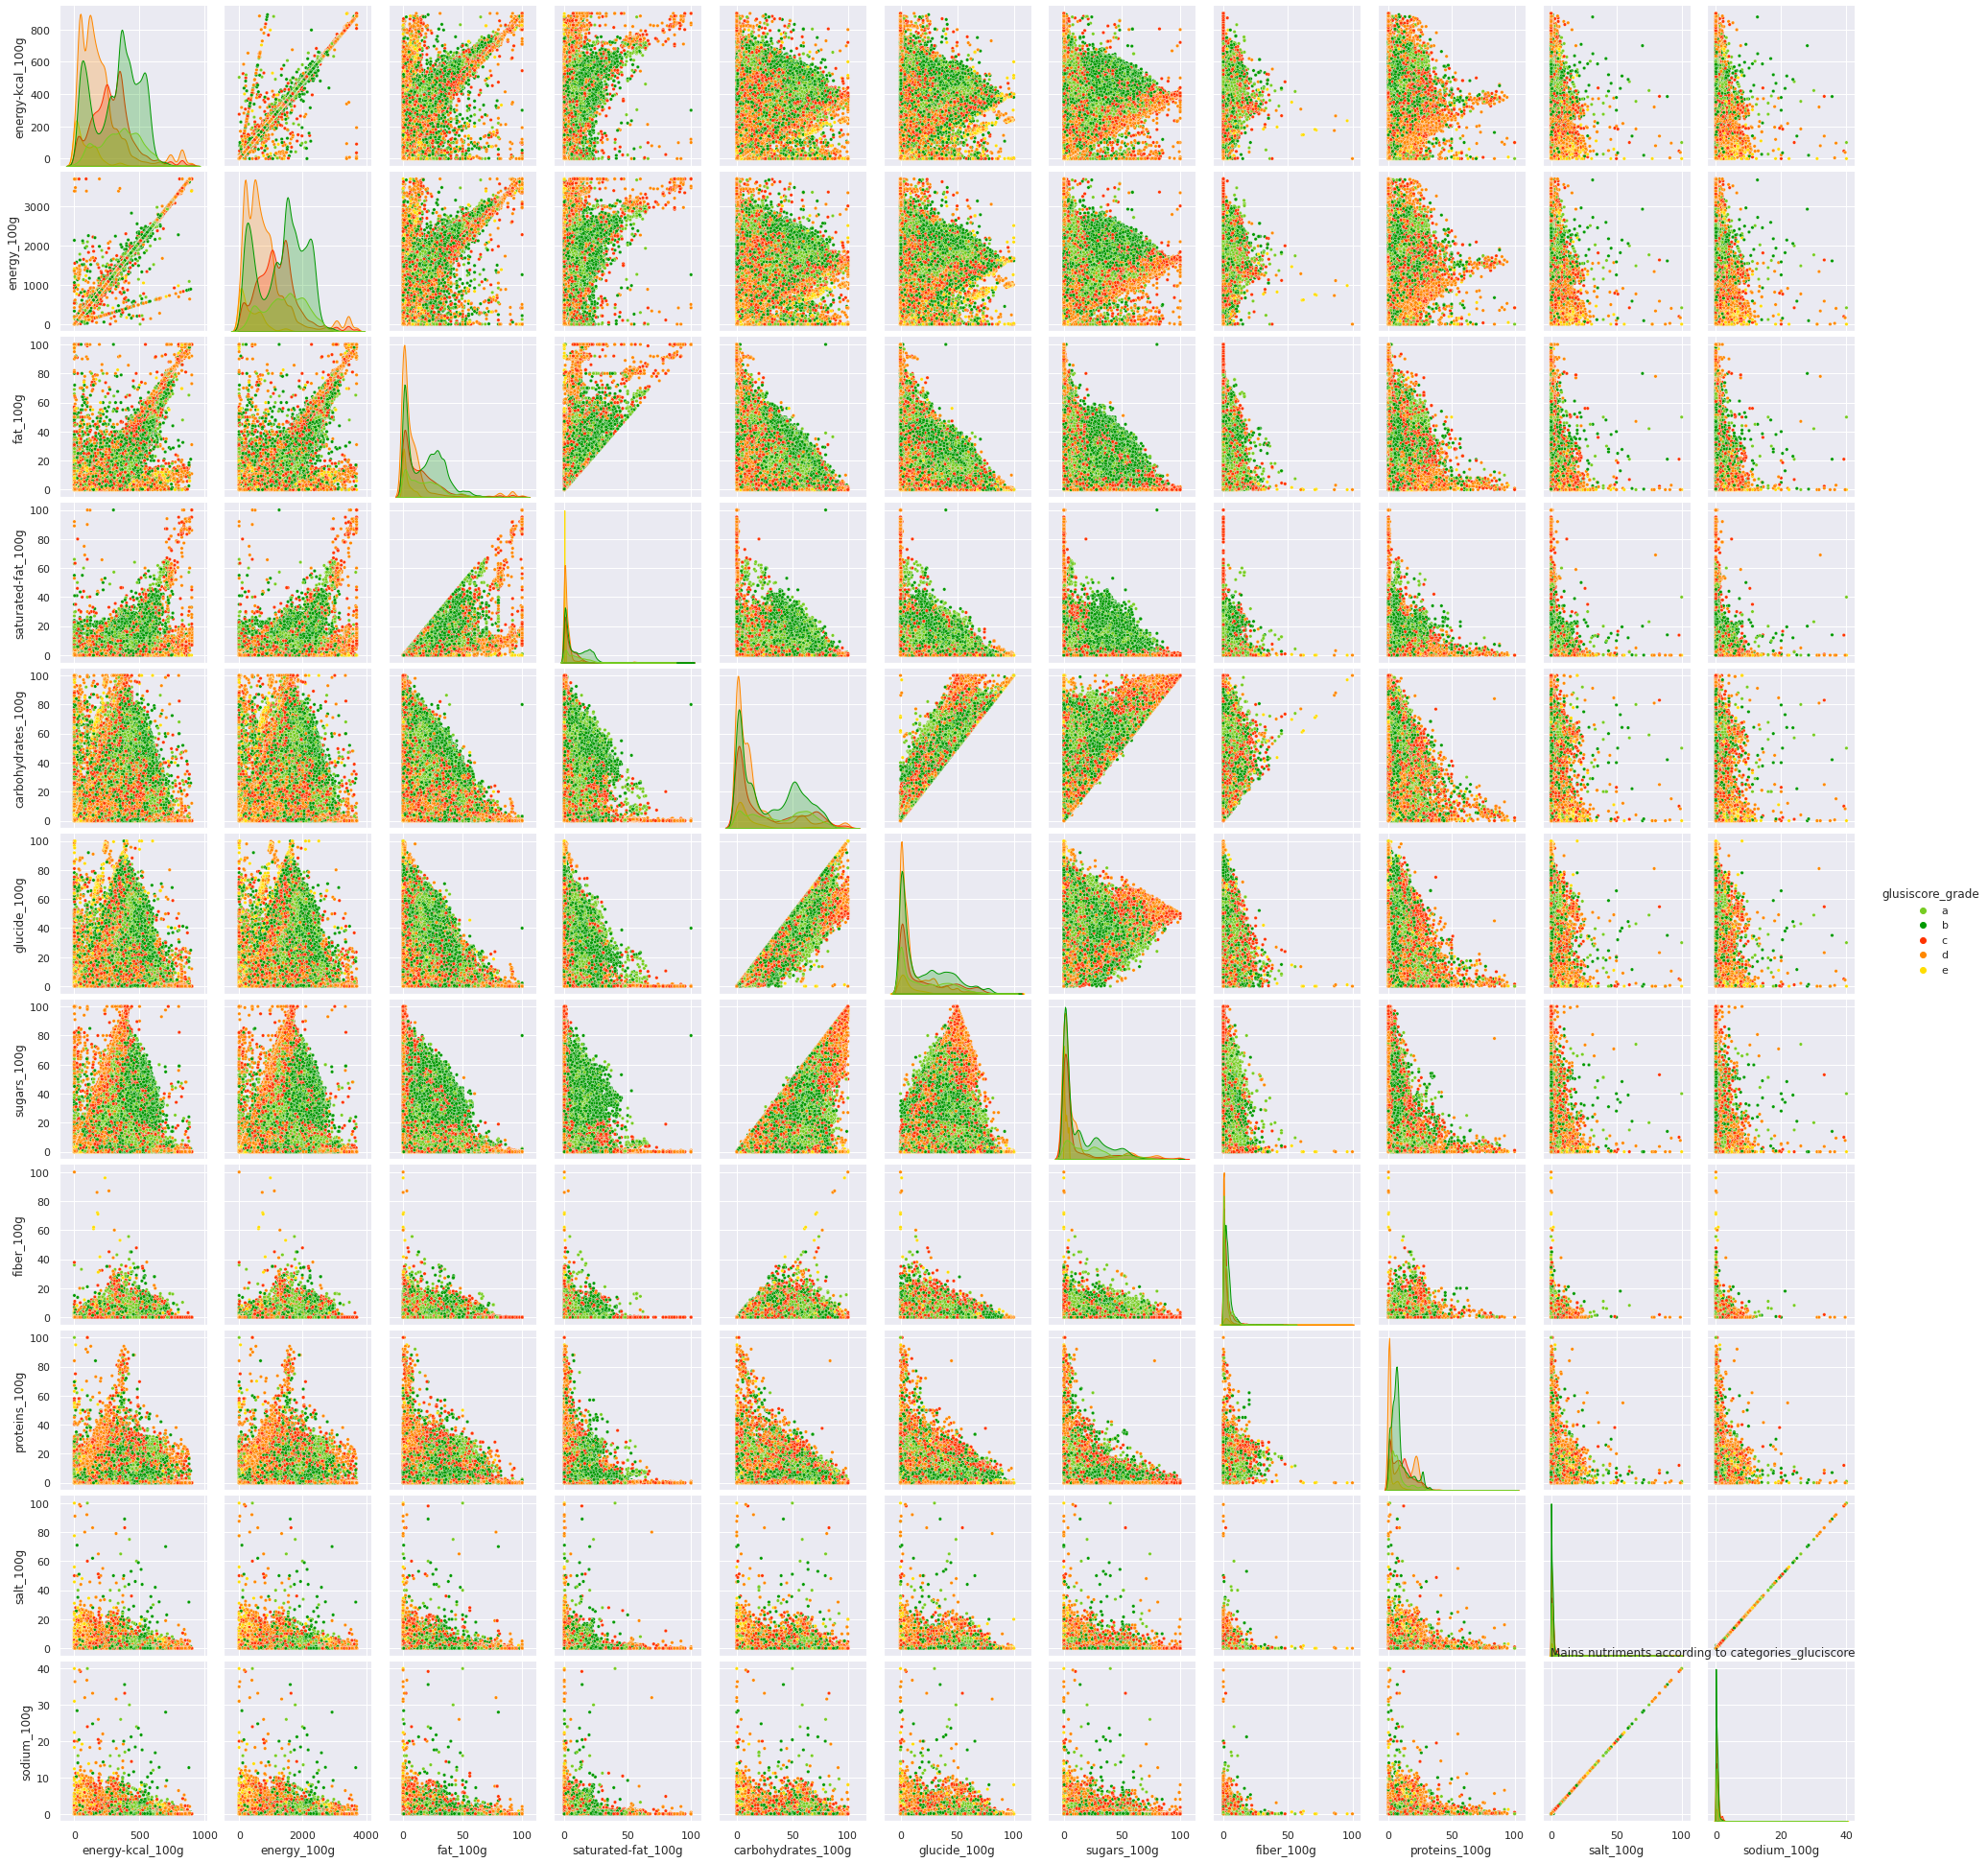

In [ ]:
sns.set(font_scale=1)
plt.figure(figsize=(4, 4))
columntocheck = [
 'energy-kcal_100g',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'glucide_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 ]
quantitative =columntocheck
qualitative = 'glusiscore_grade'
legend={}
legend_list = sorted(openFoodFile[qualitative].value_counts().index.tolist())
palette = sns.color_palette(sns.color_palette(colors), len(legend_list))
i=0
for elem in legend_list:
  legend[elem]=palette[i]
  i=i+1

sns.pairplot(openFoodFile.loc[:,quantitative + [qualitative]],          
             hue=qualitative,
             hue_order=legend_list,
             height=2.5,
             plot_kws = {'s': 12},
             palette=legend)

plt.title('Mains nutriments according to categories_gluciscore', loc='right')

L'analyse de ces pairplots montre des relations linéaires entre certaines variables. 
On remarque aussi que le regroupement par <code>categories_gluciscore</code> sur la plupart des features

<a name="cont"></a>
# tableau de contingence

Le tableau de contingence nous donne des croisements interessant entre les categories

In [ ]:
pd.crosstab(openFoodFile['gluciscore_grade'],openFoodFile['nutriscore_grade'])

nutriscore_grade      a     b      c      d      e
gluciscore_grade                                  
a                  1081  1950   6374   7265   5116
b                 11384  6879   8820  20745  18830
c                  6117  4068   7533  13451   7466
d                  5881  8676  16165  16297   6278
e                  1903  2792   1887   1099     84

In [ ]:
pd.crosstab(openFoodFile['gluciscore'],openFoodFile['pnns_groups_1'])

pnns_groups_1  Alcoholic beverages  Beverages  Cereals and potatoes  \
gluciscore                                                            
-5                               0       2530                     0   
-2                               0        158                     0   
 0                               0       6985                     0   
 1                               0         22                     0   
 3                               0        763                     0   
 5                             418       5038                     0   
 6                               0         53                     0   
 8                              11        352                     0   
 10                            147        688                  4907   
 11                              0         20                     0   
 13                             10        118                  3671   
 15                             65       1562                  2579   
 16                              0          4                  1245   
 18                              4         36                  1701   
 20                             13         16                  1534   
 21                              0          8                   479   
 23                              2          5                   709   
 25                           3115          0                   696   
 26                              1          0                   330   
 28                              5          0                   462   
 30                              2          0                   694   
 31                              0          0                   110   
 33                              0          0                   209   
 35                              0          0                     1   
 36                              0          0                    46   
 38                              0          0                     0   

pnns_groups_1  Composite foods  Fat and sauces  Fish Meat Eggs  \
gluciscore                                                       
-5                        1228             691               0   
-2                        2638             944               0   
 0                        3267            1404            5125   
 1                        1407              63               0   
 3                        4718            1448             416   
 5                        2135            4290           11753   
 6                        2288             279              82   
 8                        1915            1206             666   
 10                        349            1436           11619   
 11                        493             230              39   
 13                        278             302             395   
 15                        488             590            1636   
 16                         57              17               9   
 18                        239              60              38   
 20                          2               5            1272   
 21                         97               2               0   
 23                         17               6              20   
 25                          0               0               4   
 26                          0               0               0   
 28                          0               0               3   
 30                          0               0               0   
 31                          0               0               0   
 33                          0               0               0   
 35                          0               0               0   
 36                          0               0               0   
 38                          0               0               0   

pnns_groups_1  Fruits and vegetables  Milk and dairy products  Salty snacks  \
gluciscore                                                                    
-5  

In [ ]:
pd.crosstab(openFoodFile['gluciscore_grade'],openFoodFile['pnns_groups_1'])

pnns_groups_1     Alcoholic beverages  Beverages  Cereals and potatoes  \
gluciscore_grade                                                         
a                                3138         29                  5270   
b                                  79       1720                  9196   
c                                 158       1113                  4907   
d                                 418      12808                     0   
e                                   0       2688                     0   

pnns_groups_1     Composite foods  Fat and sauces  Fish Meat Eggs  \
gluciscore_grade                                                    
a                             116              13            1299   
b                            1062             969            2078   
c                            5045            3151           12406   
d                           11527            7205           17294   
e                            3866            1635               0   

pnns_groups_1     Fruits and vegetables  Milk and dairy products  \
gluciscore_grade                                                   
a                                  5610                     8097   
b                                  7880                    17757   
c                                  1803                      777   
d                                     0                      215   
e                                     0                        0   

pnns_groups_1     Salty snacks  Sugary snacks  
gluciscore_grade                               
a                         2359           4252  
b                         8527          23303  
c                         2274           8773  
d                          348           7703  
e                            0            688

In [ ]:
pd.crosstab(openFoodFile['gluciscore_grade'],openFoodFile['pnns_groups_2'])

pnns_groups_2     Alcoholic beverages  Appetizers  \
gluciscore_grade                                    
a                                3138         632   
b                                  79        3283   
c                                 158         654   
d                                 418         200   
e                                   0           0   

pnns_groups_2     Artificially sweetened beverages  Biscuits and cakes  Bread  \
gluciscore_grade                                                                
a                                                0                2818   1070   
b                                               38               11343   2427   
c                                               37                3167    974   
d                                              740                 681      0   
e                                              483                  84      0   

pnns_groups_2     Breakfast cereals  Cereals  Cheese  Chocolate products  \
gluciscore_grade                                                           
a                              1889     1751    2670                 713   
b                               622     4327    9909                4951   
c                               139     3057     115                 363   
d                                 0        0      94                 107   
e                                 0        0       0                   3   

pnns_groups_2     Dairy desserts  Dressings and sauces  Dried fruits  Eggs  \
gluciscore_grade                                                             
a                           1611                     4          2539   137   
b                           1909                   760            79     9   
c                            188                  2226            25   231   
d                             49                  4863             0   601   
e                              0                  1595             0     0   

pnns_groups_2     Fats  Fish and seafood  Fruit juices  Fruit nectars  Fruits  \
gluciscore_grade                                                                
a                    9               284             1              0    1621   
b                  209               251           101              9    3256   
c                  925              1630            61              5     159   
d                 2342              6129          3651            541       0   
e                   40                 0           247             16       0   

pnns_groups_2     Ice cream  Legumes  Meat  Milk and yogurt  Nuts  Offals  \
gluciscore_grade                                                            
a                      1931      323   486             1885   918      33   
b                       839      805   401             5100   566     110   
c                       157      684  2388              317   361     414   
d                         6        0  5721               66    20     235   
e                         0        0     0                0     0       0   

pnns_groups_2     One-dish meals  Pastries  Pizza pies and quiches  \
gluciscore_grade                                                     
a                             29       141                      87   
b                            662      1739                     319   
c                           3939       773                     755   
d                           9058       205                    1433   
e                           3625        20                      25   

pnns_groups_2     Plant-based milk substitutes  Potatoes  Processed meat  \
gluciscore_grade                                                           
a                                            1       237             359   
b                                           38      1015            1307   
c                                          171        53            7743   
d

<a name="reg"></a>
# regression lineaire

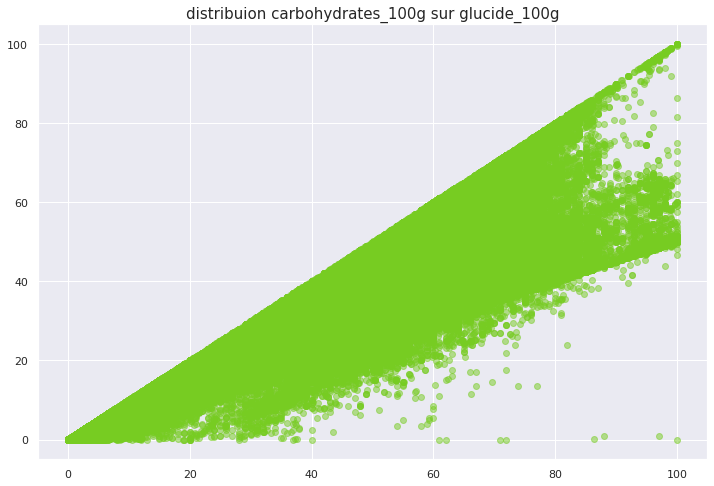

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot( openFoodFile['carbohydrates_100g'],openFoodFile['glucide_100g'],'o',alpha=0.5)
plt.title(str('distribuion carbohydrates_100g sur glucide_100g'),fontsize=15)
plt.show()

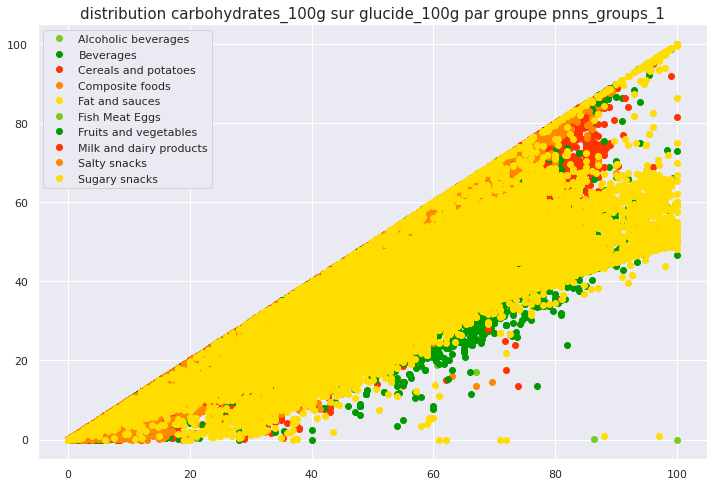

In [ ]:
import numpy as np
import seaborn as sns
from cycler import cycler
fig = plt.figure(figsize=(12,8))
grouped = openFoodFile.groupby(by=['pnns_groups_1'])
for name, group in grouped:
    plt.plot(group["carbohydrates_100g"], group["glucide_100g"], marker="o", linestyle="", label=name)
plt.legend()
plt.title(str('distribution carbohydrates_100g sur glucide_100g par groupe pnns_groups_1'),fontsize=15)
plt.show()


In [ ]:
import statsmodels.api as sm
#Methodes des moindres Carrés Ordinaire
echantillon = openFoodFile[openFoodFile['carbohydrates_100g'].notna() & openFoodFile['glucide_100g'].notna()]
Y = echantillon['carbohydrates_100g']
X = echantillon[['glucide_100g']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['glucide_100g'],result.params['intercept']
result.params

glucide_100g    1.235476
intercept       3.207561
dtype: float64

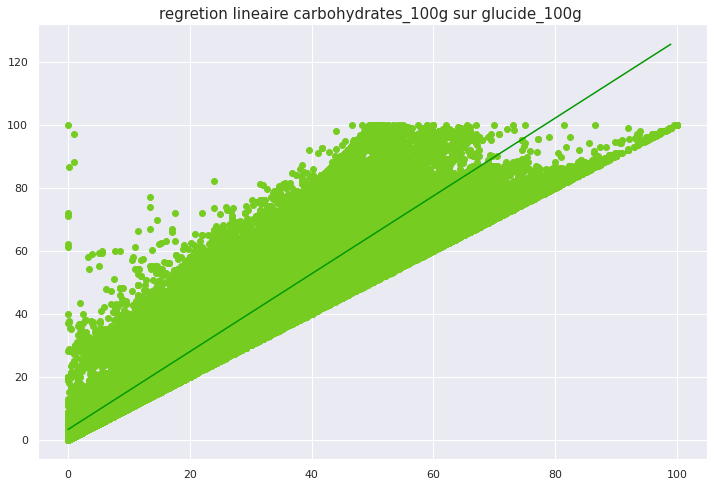

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(openFoodFile[['glucide_100g']],openFoodFile['carbohydrates_100g'], "o")
plt.plot(np.arange(100),[a*x+b for x in np.arange(100)])
plt.title(str('regretion lineaire carbohydrates_100g sur glucide_100g '),fontsize=15)
plt.show()

In [ ]:
import statsmodels.api as sm
#Methodes des moindres Carrés Ordinaire
echantillon = openFoodFile[openFoodFile['fat_100g'].notna() & openFoodFile['energy_100g'].notna()]
Y = echantillon['fat_100g']
X = echantillon[['energy_100g']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['energy_100g'],result.params['intercept']
result.params

energy_100g    0.018040
intercept     -5.966691
dtype: float64

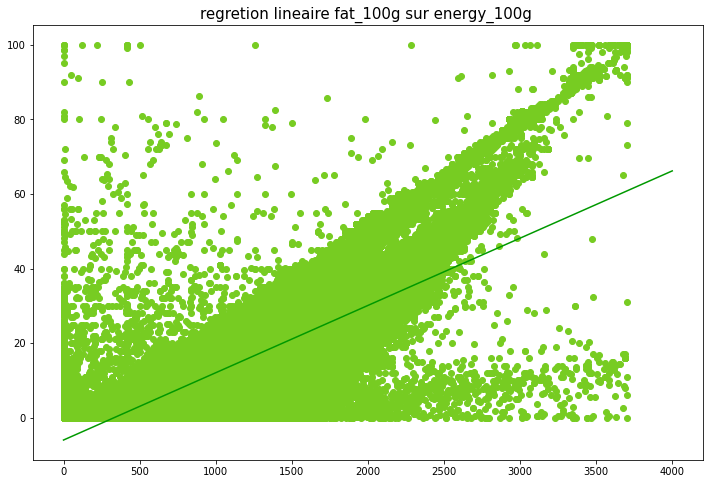

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.plot(openFoodFile[['energy_100g']],openFoodFile['fat_100g'], "o")
plt.plot(np.arange(4000),[a*x+b for x in np.arange(4000)])
plt.title(str('regretion lineaire fat_100g sur energy_100g '),fontsize=15)
plt.show()


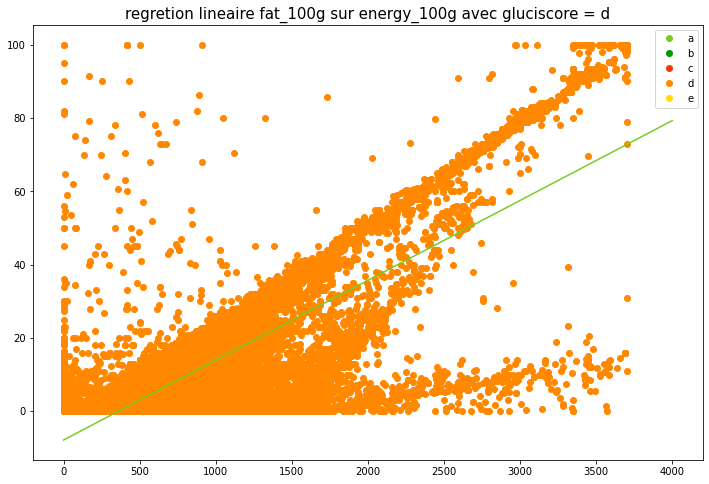

In [ ]:
import numpy as np
import seaborn as sns
sns.set_palette(sns.color_palette(colors))
from cycler import cycler
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
#Methodes des moindres Carrés Ordinaire
echantillon = openFoodFile[(openFoodFile['gluciscore_grade']=='d')]
Y = echantillon['pred_fat_100g']
X = echantillon[['pred_energy_100g']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['pred_energy_100g'],result.params['intercept']
result.params

grouped = echantillon.groupby(by=['gluciscore_grade'])
for name, group in grouped:
    plt.plot(group["pred_energy_100g"], group["pred_fat_100g"], marker="o", linestyle="", label=name)
plt.plot(np.arange(4000),[a*x+b for x in np.arange(4000)])    
plt.title(str('regretion lineaire fat_100g sur energy_100g avec gluciscore = d'),fontsize=15)
plt.legend()

plt.show()

<a name="chi"></a>
# Test du Chi 2 - Indépendance des variables


In [ ]:
# test entre deux variables categorielle
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(openFoodFile['pnns_groups_1'],openFoodFile['pnns_groups_2'])
results = chi2_contingency(table)

print("statistic tests",results[0])
print("p_valeur",results[1])
print("degre liberte",results[2])

statistic tests 1886004.0
p_valeur 0.0
degre liberte 342


**ci-dessus la p-valeur est bien inférieur à 5% on peut donc rejeter l’hypothèse selon laquelle les deux variables testées sont indépendantes.**

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2,columname):
    alpha = 0.95
    contingence_table = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(contingence_table.values)
    print('chi2 : {0:.5f},\np : {0:.5f},\ndof : {0:.5f}'.format(stat_chi2, p, dof))    
    critical = chi2.ppf(1-alpha, dof) #
    print('critital : ', critical)
    print(p)
    if p <= alpha:
        print('La variable {} est dependante de la variable pnns_groups_1 (H0 rejetée) car p = {} <= alpha = {}'.format(columname,p, alpha)+"\n")
        return False
    
    else:
        print('La variable {} est independante de pnns_groups_1(H0 non rejetée) car p = {} >= alpha = {}'.format(columname,p, alpha)+"\n")
        return True

In [ ]:
x = openFoodFile['pnns_groups_1']

columntocheck = ['pnns_groups_2']

for column in columntocheck:  
    print('test d\'indépendance {} / {}'.format('pnns_groups_1',column) +"\n")
    y = openFoodFile[column]
    test_chi2(x, y,column)    
    

test d'indépendance pnns_groups_1 / pnns_groups_2

chi2 : 1886004.00000,
p : 1886004.00000,
dof : 1886004.00000
critital :  300.1481617168933
0.0
La variable pnns_groups_2 est dependante de la variable pnns_groups_1 (H0 rejetée) car p = 0.0 <= alpha = 0.95



## trouver des dependances avec la variable gluscore_grade

In [ ]:
from scipy.stats import chi2_contingency

x = openFoodFile['gluciscore_grade']
columntocheck = ['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']
for column in columntocheck:  
    print('test d\'indépendance {} / {}'.format('gluciscore_grade',column) )
    y = openFoodFile[column]
    stat, p, dof, expected = chi2_contingency(pd.crosstab(x,y))
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
      print('Probably independent\n')
    else:
      print('Probably dependent\n')


test d'indépendance gluciscore_grade / energy_100g
stat=113773.531, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / fat_100g
stat=76108.109, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / saturated-fat_100g
stat=87379.853, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / carbohydrates_100g
stat=69725.460, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / sugars_100g
stat=73826.956, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / fiber_100g
stat=16315.107, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / proteins_100g
stat=83070.794, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / salt_100g
stat=47515.377, p=0.000
Probably dependent

test d'indépendance gluciscore_grade / sodium_100g
stat=47261.568, p=0.000
Probably dependent



Le test du CHI2 conclut au rejet de l'hypothèse d'indépendance pour toutes nos variables: on peut donc conclure qu'il y a un lien entre la valeur du gluciscore_grade et la valeur des variables quantitatives

# corrélation de Pearson sur les variables continues

**Il renvoie une valeur entre -1 et 1. Si il est proche de 1 cela signifie que les variables sont corrélées, proche de 0 que les variables sont décorrélées et proche de -1 qu’elles sont corrélées négativement.**

In [ ]:
from scipy.stats import pearsonr
columntocheck = ['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']
echantillon = openFoodFile.dropna()

pd.DataFrame(pearsonr(echantillon['glucide_100g'],echantillon['energy_100g']),index = ['pearson_coeff','p-value'], columns=['result'] )

colum = columntocheck
for i, col in enumerate(columntocheck):
    del colum[i]
    for col2 in colum:
        print("test de correllation sur {} et {}".format(col,col2))
        coeff, pvalue = pearsonr(echantillon[col],echantillon[col2])
        if(coeff < 0 ):
            print("anti correllation probable {}\n".format(coeff))        
        elif(coeff < 0.5):
            print("correllation peu probable {}\n".format(coeff))
        elif(coeff > 0.5 ):
            print("correllation probable {}\n".format(coeff))            

test de correllation sur energy_100g et fat_100g
correllation probable 0.8026330769107106

test de correllation sur energy_100g et saturated-fat_100g
correllation probable 0.6377769721775477

test de correllation sur energy_100g et carbohydrates_100g
correllation probable 0.7540064715306506

test de correllation sur energy_100g et sugars_100g
correllation probable 0.5371360307498841

test de correllation sur energy_100g et fiber_100g
correllation peu probable 0.40859197581474

test de correllation sur energy_100g et proteins_100g
correllation peu probable 0.23258589736033608

test de correllation sur energy_100g et salt_100g
correllation peu probable 0.07010157652283416

test de correllation sur energy_100g et sodium_100g
correllation peu probable 0.07010361380553207

test de correllation sur saturated-fat_100g et fat_100g
correllation probable 0.7480292498505003

test de correllation sur saturated-fat_100g et carbohydrates_100g
correllation peu probable 0.24791043990239164

test de co

 Dans nos resultats, le coefficient sodium_100g salt_100g a une valeur de 0.9999999608219478 ce qui signifie que les variables sont fortement corrélées.

<a name="Smirnov"></a>
#  Test de normalité Kolmogorov Smirnov

In [ ]:
from scipy import stats
numeric_columns = openFoodFile.select_dtypes('float64').columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(openFoodFile[column].dropna(), 
                     'norm', 
                     args=(openFoodFile[column].mean(), openFoodFile[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected : {} is not from a normal distribution".format(column))
    else:
        print("The null hypothesis cannot be rejected")

________
additives_n
p = 0.0
The null hypothesis can be rejected : additives_n is not from a normal distribution
________
ingredients_from_palm_oil_n
p = 0.0
The null hypothesis can be rejected : ingredients_from_palm_oil_n is not from a normal distribution
________
ingredients_that_may_be_from_palm_oil_n
p = 0.0
The null hypothesis can be rejected : ingredients_that_may_be_from_palm_oil_n is not from a normal distribution
________
nutriscore_score
p = 0.0
The null hypothesis can be rejected : nutriscore_score is not from a normal distribution
________
nova_group
p = 0.0
The null hypothesis can be rejected : nova_group is not from a normal distribution
________
energy-kcal_100g
p = 0.0
The null hypothesis can be rejected : energy-kcal_100g is not from a normal distribution
________
energy_100g
p = 0.0
The null hypothesis can be rejected : energy_100g is not from a normal distribution
________
fat_100g
p = 0.0
The null hypothesis can be rejected : fat_100g is not from a normal distribut

**nos distributions ne sont pas normal**

<a name="friem"></a>
# Friedman Test

In [ ]:

# Example of the Friedman Test
from scipy.stats import friedmanchisquare

data1 = openFoodFile['fat_100g'].sample(50).values
data2 = openFoodFile['saturated-fat_100g'].sample(50).values
data3 = openFoodFile['carbohydrates_100g'].sample(50).values

stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=6.061, p=0.048
Probably different distributions


# Wilcoxon Signed-Rank Test

Tests whether the distributions of two paired samples are equal or not.

In [ ]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
columntocheck = ['energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','glucide_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']
for col in columntocheck:
  for col2 in columntocheck:
    data1 = openFoodFile[col].sample(50)
    data2 = openFoodFile[col2].sample(50)
    if col != col2:
      stat, p = wilcoxon(data1, data2)  
      if p > 0.05:
        print('test de dependance entre {:-<20} et {:-<20}'.format(col,col2))
        print('stat=%.3f, p=%.3f' % (stat, p))
        print('Probably the same distribution'+"\n")



test de dependance entre fat_100g------------ et saturated-fat_100g--
stat=399.000, p=0.081
Probably the same distribution

test de dependance entre fat_100g------------ et glucide_100g--------
stat=564.000, p=0.629
Probably the same distribution

test de dependance entre fat_100g------------ et proteins_100g-------
stat=497.000, p=0.175
Probably the same distribution

test de dependance entre saturated-fat_100g-- et sugars_100g---------
stat=411.000, p=0.069
Probably the same distribution

test de dependance entre glucide_100g-------- et fat_100g------------
stat=499.500, p=0.261
Probably the same distribution

test de dependance entre glucide_100g-------- et sugars_100g---------
stat=584.500, p=0.609
Probably the same distribution

test de dependance entre sugars_100g--------- et fat_100g------------
stat=463.500, p=0.138
Probably the same distribution

test de dependance entre sugars_100g--------- et glucide_100g--------
stat=437.000, p=0.081
Probably the same distribution

test de 

On note une correlation entre :

  * <code>sugars_100g</code> et <code>proteins_100g</code>
    
  * <code>sugars_100g</code> et <code>fat_100g</code>
    
  * <code>sugars_100g</code> et <code>fat_100g</code>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
columntocheck = ['gluciscore','energy-kcal_100g','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','glucide_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g']

echantillon = openFoodFile[openFoodFile[columntocheck].notnull().all(1)][columntocheck].sample(10000)
X = echantillon
y = X['gluciscore']
X = X.drop(['gluciscore'],axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)
print('ordonnée à l\'origine', lr.intercept_)


R² sur jeu d'entraînement :  0.23412950795970866
R² sur jeu de test 0.21056408618257738
Poids de chaque variable dans la régression [ 4.44895951e-02  1.59610038e+00 -8.28253348e-01  2.14109429e+00
  5.24923884e-01  1.88152523e-01  1.10088191e+00 -9.62226914e-02
  2.89531251e-01 -1.61848946e+02  1.61542300e+02]
ordonnée à l'origine 12.701344615325558


On a un coefficient R² de 0,22 pour le jeu de test ce qui est un résultat  mauvais.

In [ ]:
resultat = pd.DataFrame({'gluciscore_prediction' : y_test, 'prediction' : lr.predict(X_test)}).reset_index()

In [ ]:
resultat.head()

index  gluciscore_prediction  prediction
0   82350                      1    8.940577
1   50172                      1    9.198068
2  137166                     11   13.264507
3  160352                      5    8.639904
4   11065                     16   11.975934

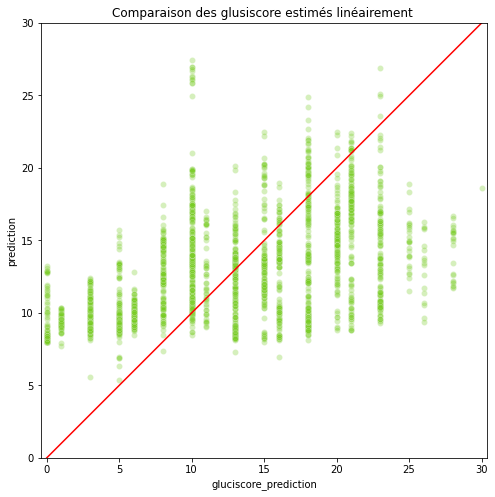

In [ ]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Comparaison des glusiscore estimés linéairement ')
sns.scatterplot(x = resultat['gluciscore_prediction'], y = resultat['prediction'], alpha=0.3)
sns.lineplot([0 , 30], [0, 30], color='red')
ax = plt.gca()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
plt.show()